# Plotting Time Series Data

### Prepare Data

In [4]:
# conda install -c pyviz hvplot

In [332]:
import pandas as pd
from pandas_datareader.yahoo.daily import YahooDailyReader
from pathlib import Path
import panel as pn

In [199]:
reader = YahooDailyReader(symbols=['AAPL','MSFT','IBM'],
                     start='11/1/2019',
                     end='11/1/2021')

In [200]:
df = reader.read()

In [201]:
reader.close()

In [202]:
df.head()

Attributes  Adj Close                              Close              \
Symbols          AAPL        MSFT         IBM       AAPL        MSFT   
Date                                                                   
2019-11-01  62.830288  140.553009  115.847473  63.955002  143.720001   
2019-11-04  63.242901  141.364746  117.676666  64.375000  144.550003   
2019-11-05  63.152020  141.276718  117.864738  64.282501  144.460007   
2019-11-06  63.179031  140.885513  118.625473  64.309998  144.059998   
2019-11-07  63.908203  141.081131  119.083832  64.857498  144.259995   

Attributes                   High                                Low  \
Symbols            IBM       AAPL        MSFT         IBM       AAPL   
Date                                                                   
2019-11-01  129.569794  63.982498  144.419998  129.598465  62.290001   
2019-11-04  131.615677  64.462502  145.000000  131.682602  63.845001   
2019-11-05  131.826004  64.547501  145.020004  132.657745  64.080002   
2019-11-06  132.676865  64.372498  144.520004  132.676865  63.842499   
2019-11-07  131.634796  65.087502  144.880005  133.021027  64.527496   

Attributes                               Open                          \
Symbols           MSFT         IBM       AAPL        MSFT         IBM   
Date                                                                    
2019-11-01  142.970001  128.193115  62.384998  144.259995  128.585083   
2019-11-04  144.160004  130.238998  64.332497  144.830002  130.248566   
2019-11-05  143.910004  131.577438  64.262497  144.970001  131.739960   
2019-11-06  143.199997  131.500961  64.192497  144.369995  131.931168   
2019-11-07  143.770004  131.529633  64.684998  143.839996  131.806885   

Attributes       Volume                         
Symbols            AAPL        MSFT        IBM  
Date                                            
2019-11-01  151125200.0  33128400.0  3231931.0  
2019-11-04  103272000.0  16912000.0  3488828.0  
2019-11-05   79897600.0  18250200.0  3153690.0  
2019-11-06   75864400.0  16575800.0  4683256.0  
2019-11-07   94940400.0  17786700.0  4261195.0

In [203]:
closing_price = df['Close']

In [204]:
closing_price.tail()

Symbols,AAPL,MSFT,IBM
Date,,,
2021-10-26,149.320007,310.109985,121.539200
2021-10-27,148.850006,323.170013,119.665390
2021-10-28,152.570007,324.350006,120.305923
2021-10-29,149.800003,331.619995,119.598473
2021-11-01,148.960007,329.369995,120.726578


In [205]:
# store data into csv
# file = Path('../../datasets/Ch8/closing_price.csv')
# closing_price.to_csv(file)
closing_price = pd.read_csv(file, index_col='Date', parse_dates=True)

In [206]:
closing_price.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,63.955002,143.720001,129.569794
2019-11-04,64.375000,144.550003,131.615677
2019-11-05,64.282501,144.460007,131.826004
2019-11-06,64.309998,144.059998,132.676865
2019-11-07,64.857498,144.259995,131.634796


## Plotting Data

In [207]:
import matplotlib.pyplot as plt
from vega_datasets import data
import altair as alt
import seaborn as sns

# Option using hvplot as backend
# pd.options.plotting.backend = 'holoviews'
import hvplot.pandas

plotting using pandas built-in plot (uses matplotlib)

<AxesSubplot:xlabel='Date'>

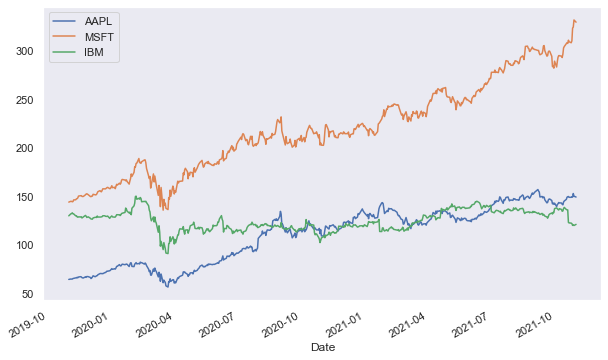

In [208]:
closing_price.plot(figsize=(10,6))

In [209]:
closing_price_n = (closing_price/closing_price.iloc[0])
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.014111,1.003757,1.015937


In [210]:
fig_dims = (10, 6)

<AxesSubplot:xlabel='Date'>

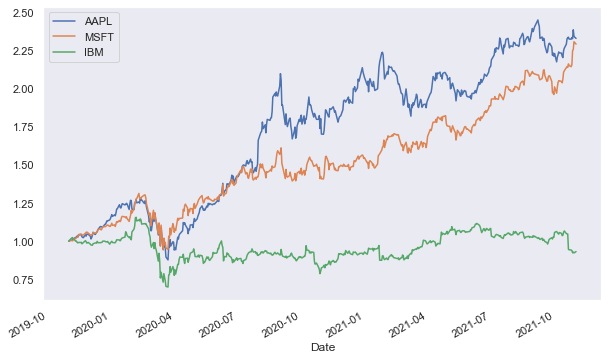

In [211]:
closing_price_n.plot(figsize=fig_dims)

<AxesSubplot:xlabel='Date'>

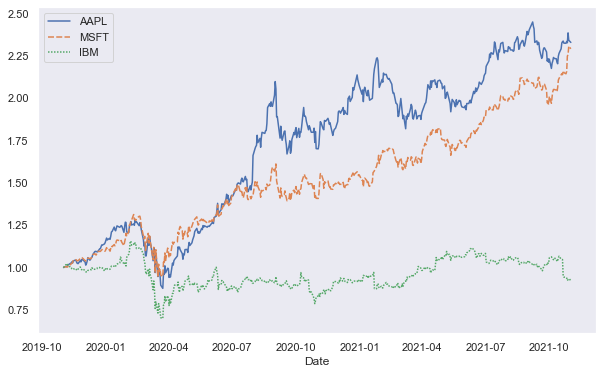

In [212]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=closing_price_n, ax=ax)

In [213]:
closing_price_n.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [214]:
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

,Date,variable,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.014111


In [217]:
alt.Chart(melted_cp).mark_line().encode(
    x='Date:T',
    y='value',
    color='variable',
    strokeDash='variable'
)

alt.Chart(...)

### subplots

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

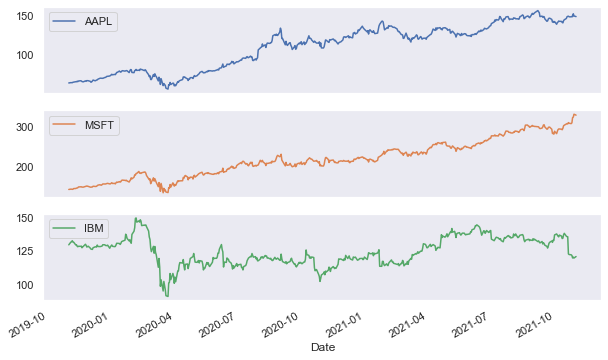

In [218]:
closing_price.plot(subplots=True, figsize=fig_dims)

In [222]:
closing_price.hvplot(subplots=True, figsize=fig_dims, width=400)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [225]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

In [226]:
symbols = closing_price.columns.tolist()

In [227]:
melted_cp.head()

,Date,variable,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.014111


In [228]:
melted_cp.head()

,Date,variable,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.014111


In [229]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [324]:
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


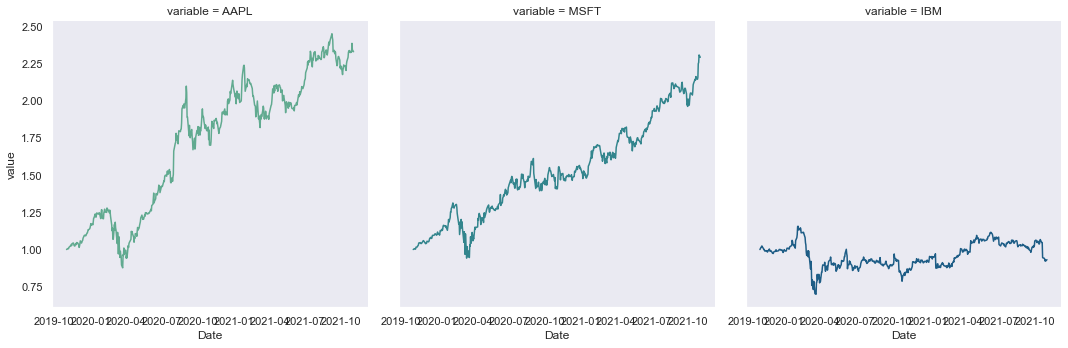

In [330]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=melted_cp,
    x="Date", y="value", col="variable", hue="variable",
    kind="line", palette="crest", legend=False, #col_wrap=1,
)

In [293]:
closing_price.hvplot.violin(by='index.year', width=400)

:Violin   [Variable]   (value)

In [297]:
closing_price['AAPL'].hvplot.violin(by=['index.year','index.month'])

:Violin   [index.year,index.month]   (AAPL)

In [308]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [278]:
aapl_2020 = closing_price[closing_price.index.year == 2020]['AAPL']

In [312]:
aapl_2020.hvplot(groupby=['index.year', 'index.month'], widget_type='scrubber', widget_location='bottom')


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=11, width=550)
        [2] HSpacer()